In [93]:
#To jest plik z kodem, na podstawie którego została opracowana
#Praca inżynierska 
#"System rekomendacji użytkowników na przykładzie aplikacji randkowych - poprawa preferencji"

In [94]:
import pandas as pd
import os
import urllib

OKCUPID_PATH = os.path.join("inzynier")

def load_okcupid_data(okcupid_path=OKCUPID_PATH):
    csv_path = os.path.join(okcupid_path, "okcupid.csv")
    try:
        okcupid_data = pd.read_csv(csv_path)
        print("Dane zostały wczytane pomyślnie.")
        return okcupid_data
    except Exception as e:
        print("Błąd podczas wczytywania pliku CSV:", e)

okcupid_data = load_okcupid_data()
print(okcupid_data)

Dane zostały wczytane pomyślnie.
       age     status sex orientation       body_type               diet  \
0       22     single   m    straight  a little extra  strictly anything   
1       35     single   m    straight         average       mostly other   
2       38  available   m    straight            thin           anything   
3       23     single   m    straight            thin         vegetarian   
4       29     single   m    straight        athletic                NaN   
...    ...        ...  ..         ...             ...                ...   
59941   59     single   f    straight             NaN                NaN   
59942   24     single   m    straight             fit    mostly anything   
59943   42     single   m    straight         average    mostly anything   
59944   27     single   m    straight        athletic    mostly anything   
59945   39     single   m         gay         average                NaN   

           drinks      drugs                          

In [95]:
okcupid_original = load_okcupid_data()
okcupid_original.head()

Dane zostały wczytane pomyślnie.


,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN


In [96]:
info_df = pd.DataFrame({
    "Column Name": okcupid_original.columns,
    "Non-Null Count": okcupid_original.count(),
    "Dtype": okcupid_original.dtypes,
    "Unique Values": [okcupid_original[col].nunique() for col in okcupid_original.columns]
})

info_df = info_df.reset_index(drop=True)

print(info_df)

    Column Name  Non-Null Count    Dtype  Unique Values
0           age           59946    int64             54
1        status           59946   object              5
2           sex           59946   object              2
3   orientation           59946   object              3
4     body_type           54650   object             12
5          diet           35551   object             18
6        drinks           56961   object              6
7         drugs           45866   object              3
8     education           53318   object             32
9     ethnicity           54266   object            217
10       height           59943  float64             60
11       income           59946    int64             13
12          job           51748   object             21
13  last_online           59946   object          30123
14     location           59946   object            199
15    offspring           24385   object             15
16         pets           40025   object        

In [97]:
okcupid_original["status"].value_counts()

status
single            55697
seeing someone     2064
available          1865
married             310
unknown              10
Name: count, dtype: int64

In [98]:
okcupid_original["sex"].value_counts()

sex
m    35829
f    24117
Name: count, dtype: int64

In [99]:
okcupid_original["orientation"].value_counts()

orientation
straight    51606
gay          5573
bisexual     2767
Name: count, dtype: int64

In [100]:
okcupid_original["body_type"].value_counts()

body_type
average           14652
fit               12711
athletic          11819
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: count, dtype: int64

In [101]:
okcupid_original["diet"].value_counts()

diet
mostly anything        16585
anything                6183
strictly anything       5113
mostly vegetarian       3444
mostly other            1007
strictly vegetarian      875
vegetarian               667
strictly other           452
mostly vegan             338
other                    331
strictly vegan           228
vegan                    136
mostly kosher             86
mostly halal              48
strictly halal            18
strictly kosher           18
halal                     11
kosher                    11
Name: count, dtype: int64

In [102]:
okcupid_original["drinks"].value_counts()

drinks
socially       41780
rarely          5957
often           5164
not at all      3267
very often       471
desperately      322
Name: count, dtype: int64

In [103]:
okcupid_original["drugs"].value_counts()

drugs
never        37724
sometimes     7732
often          410
Name: count, dtype: int64

In [104]:
okcupid_original["education"].value_counts()

education
graduated from college/university    23959
graduated from masters program        8961
working on college/university         5712
working on masters program            1683
graduated from two-year college       1531
graduated from high school            1428
graduated from ph.d program           1272
graduated from law school             1122
working on two-year college           1074
dropped out of college/university      995
working on ph.d program                983
college/university                     801
graduated from space camp              657
dropped out of space camp              523
graduated from med school              446
working on space camp                  445
working on law school                  269
two-year college                       222
working on med school                  212
dropped out of two-year college        191
dropped out of masters program         140
masters program                        136
dropped out of ph.d program            127
d

In [105]:
okcupid_original["ethnicity"].value_counts()

ethnicity
white                                                                 32831
asian                                                                  6134
hispanic / latin                                                       2823
black                                                                  2008
other                                                                  1706
                                                                      ...  
middle eastern, indian, white                                             1
asian, middle eastern, black, white, other                                1
asian, middle eastern, indian, hispanic / latin, white, other             1
black, native american, indian, pacific islander, hispanic / latin        1
asian, black, indian                                                      1
Name: count, Length: 217, dtype: int64

In [106]:
okcupid_original["job"].value_counts()

job
other                                7589
student                              4882
science / tech / engineering         4848
computer / hardware / software       4709
artistic / musical / writer          4439
sales / marketing / biz dev          4391
medicine / health                    3680
education / academia                 3513
executive / management               2373
banking / financial / real estate    2266
entertainment / media                2250
law / legal services                 1381
hospitality / travel                 1364
construction / craftsmanship         1021
clerical / administrative             805
political / government                708
rather not say                        436
transportation                        366
unemployed                            273
retired                               250
military                              204
Name: count, dtype: int64

In [107]:
okcupid_original["location"].value_counts()

location
san francisco, california         31064
oakland, california                7214
berkeley, california               4212
san mateo, california              1331
palo alto, california              1064
                                  ...  
south wellfleet, massachusetts        1
orange, california                    1
astoria, new york                     1
london, united kingdom                1
rochester, michigan                   1
Name: count, Length: 199, dtype: int64

In [108]:
okcupid_original["offspring"].value_counts()

offspring
doesn't have kids                          7560
doesn't have kids, but might want them     3875
doesn't have kids, but wants them          3565
doesn't want kids                          2927
has kids                                   1883
has a kid                                  1881
doesn't have kids, and doesn't want any    1132
has kids, but doesn't want more             442
has a kid, but doesn't want more            275
has a kid, and might want more              231
wants kids                                  225
might want kids                             182
has kids, and might want more               115
has a kid, and wants more                    71
has kids, and wants more                     21
Name: count, dtype: int64

In [109]:
okcupid_original["pets"].value_counts()

pets
likes dogs and likes cats          14814
likes dogs                          7224
likes dogs and has cats             4313
has dogs                            4134
has dogs and likes cats             2333
likes dogs and dislikes cats        2029
has dogs and has cats               1474
has cats                            1406
likes cats                          1063
has dogs and dislikes cats           552
dislikes dogs and likes cats         240
dislikes dogs and dislikes cats      196
dislikes cats                        122
dislikes dogs and has cats            81
dislikes dogs                         44
Name: count, dtype: int64

In [110]:
okcupid_original["religion"].value_counts()

religion
agnosticism                                   2724
other                                         2691
agnosticism but not too serious about it      2636
agnosticism and laughing about it             2496
catholicism but not too serious about it      2318
atheism                                       2175
other and laughing about it                   2119
atheism and laughing about it                 2074
christianity                                  1957
christianity but not too serious about it     1952
other but not too serious about it            1554
judaism but not too serious about it          1517
atheism but not too serious about it          1318
catholicism                                   1064
christianity and somewhat serious about it     927
atheism and somewhat serious about it          848
other and somewhat serious about it            846
catholicism and laughing about it              726
judaism and laughing about it                  681
buddhism but not too s

In [111]:
okcupid_original["sign"].value_counts()

sign
gemini and it&rsquo;s fun to think about         1782
scorpio and it&rsquo;s fun to think about        1772
leo and it&rsquo;s fun to think about            1692
libra and it&rsquo;s fun to think about          1649
taurus and it&rsquo;s fun to think about         1640
cancer and it&rsquo;s fun to think about         1597
pisces and it&rsquo;s fun to think about         1592
sagittarius and it&rsquo;s fun to think about    1583
virgo and it&rsquo;s fun to think about          1574
aries and it&rsquo;s fun to think about          1573
aquarius and it&rsquo;s fun to think about       1503
virgo but it doesn&rsquo;t matter                1497
leo but it doesn&rsquo;t matter                  1457
cancer but it doesn&rsquo;t matter               1454
gemini but it doesn&rsquo;t matter               1453
taurus but it doesn&rsquo;t matter               1450
libra but it doesn&rsquo;t matter                1408
aquarius but it doesn&rsquo;t matter             1408
capricorn and it&rsquo;

In [112]:
okcupid_original["smokes"].value_counts()

smokes
no                43896
sometimes          3787
when drinking      3040
yes                2231
trying to quit     1480
Name: count, dtype: int64

In [113]:
okcupid_original["speaks"].value_counts()

speaks
english                                                                21828
english (fluently)                                                      6628
english (fluently), spanish (poorly)                                    2059
english (fluently), spanish (okay)                                      1917
english (fluently), spanish (fluently)                                  1288
                                                                       ...  
english (fluently), urdu (poorly), japanese (poorly), french (okay)        1
english, spanish, hindi, c++                                               1
english (fluently), japanese (okay), thai (okay), chinese (poorly)         1
english (fluently), french (okay), italian (okay), hebrew (okay)           1
english (fluently), french, farsi                                          1
Name: count, Length: 7647, dtype: int64

In [114]:
okcupid_original.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


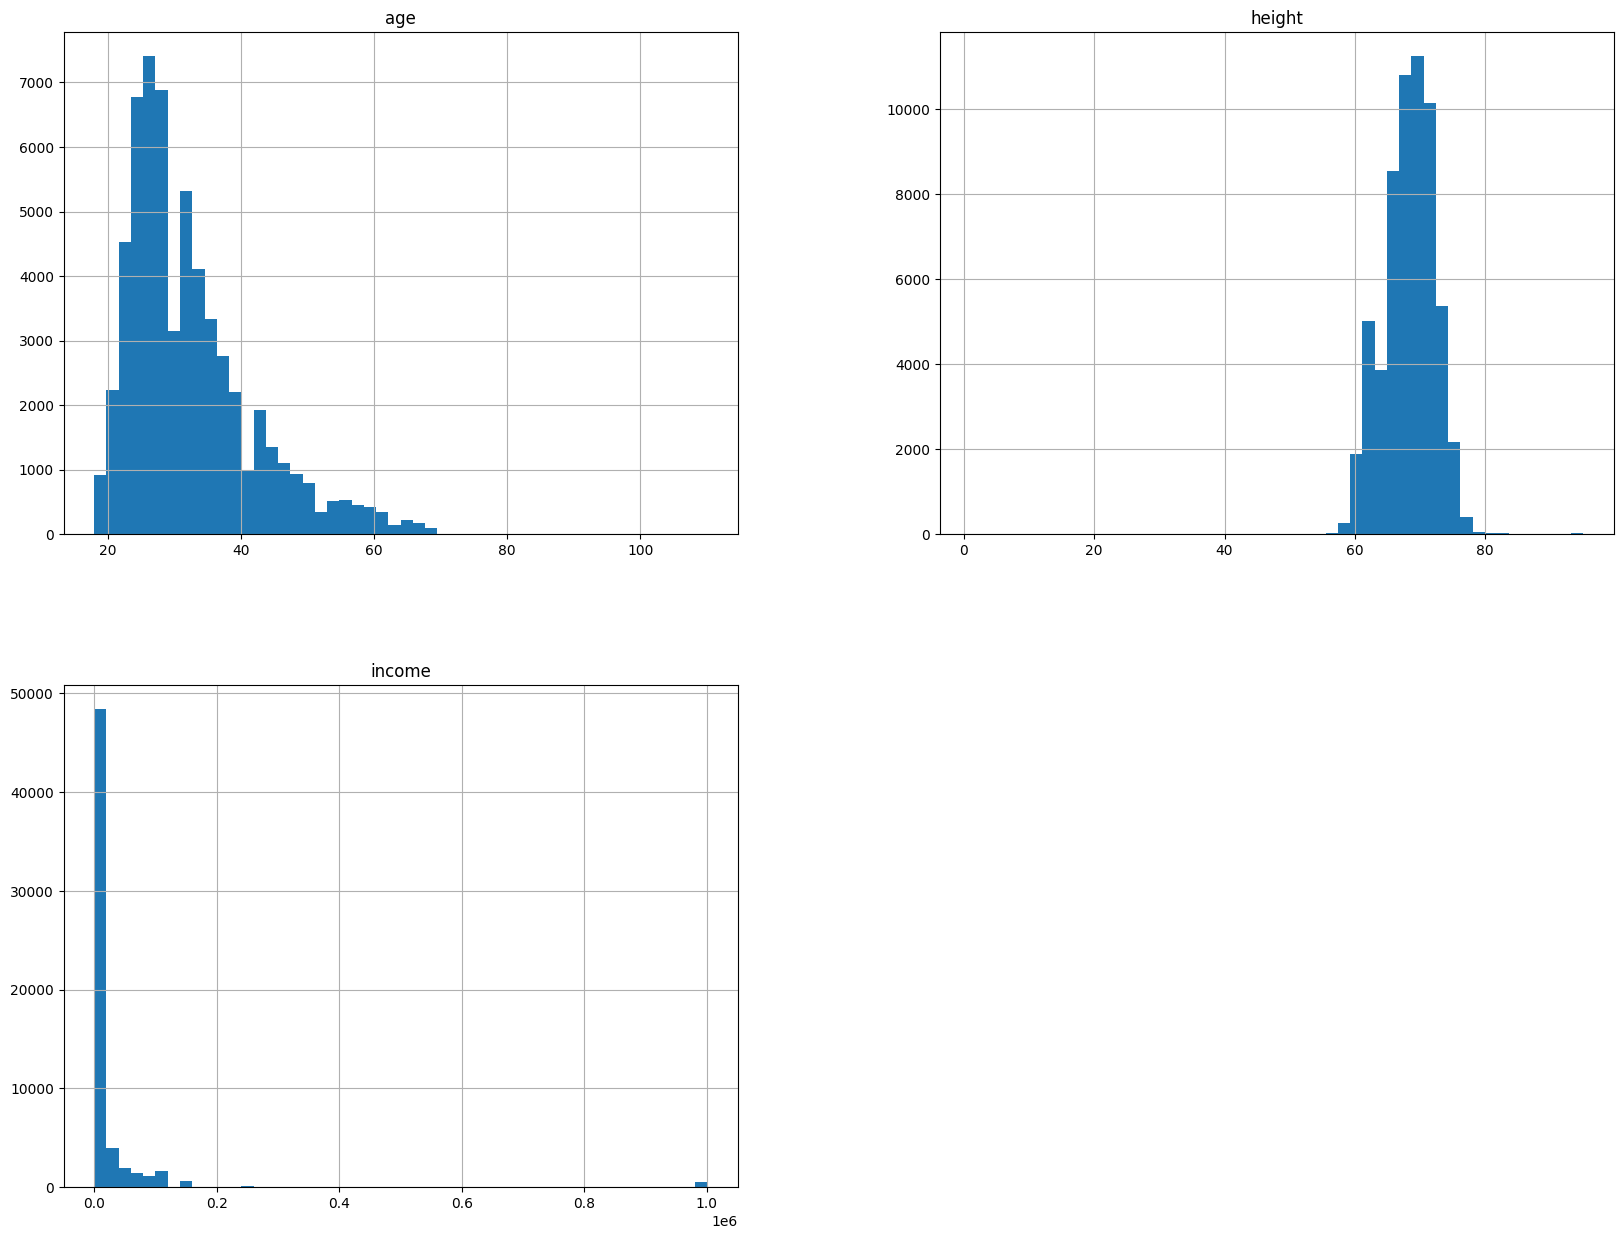

In [115]:
%matplotlib inline
import matplotlib.pyplot as plt
okcupid_original.hist(bins=50, figsize=(20,15))
plt.show()

In [116]:
#Dane nie są atrakcyjne do analizy przez algorytmy uczenia maszynowego
#Zostaną one przekształcone zgtodnie z proponowanym harmonogramem w dokumentacji (praca inżynierska)

In [117]:
#Dodawanie unikalnego identyfikatora do każdego wiersza na oryginale
import uuid
ids = [uuid.uuid4() for _ in range(len(okcupid_original))]
okcupid_original.insert(0, 'id', ids)

In [118]:
okcupid_original.head()

,id,age,status,sex,orientation,body_type,diet,drinks,drugs,education,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,04ed9dc8-89f5-422f-a0d4-45cae6c399cf,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,baa3bf87-f83c-4bc2-9956-c438e135d5a3,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,...,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,dce80e3b-b497-48cd-abb5-777e00249655,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,...,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,bc2c2644-6b41-4dcb-ab0d-e64311ced92e,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,...,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,bfe5ec97-be4a-4016-8f20-2331038fca36,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,...,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN


In [119]:
#Kopiowanie zbioru danych
okcupid = okcupid_original.copy()

In [120]:
print("Przed usunięciem kolumn:")
print(okcupid.info())

Przed usunięciem kolumn:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           59946 non-null  object 
 1   age          59946 non-null  int64  
 2   status       59946 non-null  object 
 3   sex          59946 non-null  object 
 4   orientation  59946 non-null  object 
 5   body_type    54650 non-null  object 
 6   diet         35551 non-null  object 
 7   drinks       56961 non-null  object 
 8   drugs        45866 non-null  object 
 9   education    53318 non-null  object 
 10  ethnicity    54266 non-null  object 
 11  height       59943 non-null  float64
 12  income       59946 non-null  int64  
 13  job          51748 non-null  object 
 14  last_online  59946 non-null  object 
 15  location     59946 non-null  object 
 16  offspring    24385 non-null  object 
 17  pets         40025 non-null  object 
 18  religion     39720 no

In [121]:
columns_to_drop = ['ethnicity', 'height', 'income', 'last_online','location', 'sign', 'speaks', 'essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']

In [122]:
okcupid.drop(columns=columns_to_drop, inplace=True)

In [123]:
print("Po usunięciu kolumn:")
print(okcupid.info())

Po usunięciu kolumn:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           59946 non-null  object
 1   age          59946 non-null  int64 
 2   status       59946 non-null  object
 3   sex          59946 non-null  object
 4   orientation  59946 non-null  object
 5   body_type    54650 non-null  object
 6   diet         35551 non-null  object
 7   drinks       56961 non-null  object
 8   drugs        45866 non-null  object
 9   education    53318 non-null  object
 10  job          51748 non-null  object
 11  offspring    24385 non-null  object
 12  pets         40025 non-null  object
 13  religion     39720 non-null  object
 14  smokes       54434 non-null  object
dtypes: int64(1), object(14)
memory usage: 6.9+ MB
None


In [124]:
#Czyszczenie wierszy z nieporządanych wartości
okcupid = okcupid[~okcupid['status'].isin(['married', 'unknown'])]
okcupid = okcupid[~okcupid['orientation'].isin(['bisexual', 'gay'])]

In [125]:
okcupid["status"].value_counts()

status
single            48710
seeing someone     1490
available          1172
Name: count, dtype: int64

In [126]:
okcupid["orientation"].value_counts()

orientation
straight    51372
Name: count, dtype: int64

In [127]:
#1 kodowanie one-hot kolumna [sex]
okcupid = pd.get_dummies(okcupid, columns=['sex'])

In [128]:
print("Po one-hot encoding:")
print(okcupid)

Po one-hot encoding:
                                         id  age     status orientation  \
0      04ed9dc8-89f5-422f-a0d4-45cae6c399cf   22     single    straight   
1      baa3bf87-f83c-4bc2-9956-c438e135d5a3   35     single    straight   
2      dce80e3b-b497-48cd-abb5-777e00249655   38  available    straight   
3      bc2c2644-6b41-4dcb-ab0d-e64311ced92e   23     single    straight   
4      bfe5ec97-be4a-4016-8f20-2331038fca36   29     single    straight   
...                                     ...  ...        ...         ...   
59940  0488df86-5004-4df9-b82c-86d0f2f64183   31     single    straight   
59941  67c1b5b1-90d0-49cf-b81c-711e38f5f663   59     single    straight   
59942  31564eff-1d97-4fce-b92e-ad6ffec7edfe   24     single    straight   
59943  d08e5a9d-9d87-46f8-8d51-aff79cc81ed3   42     single    straight   
59944  cca79405-a22b-4e9f-89f0-454d9fffc2f7   27     single    straight   

            body_type               diet      drinks      drugs  \
0      a li

In [129]:
okcupid=okcupid.copy()

In [130]:
#Podział sylwetek na 4 "kubki", do których będą trafiać określone typy
class BodyTypeEncoder:
    def __init__(self):
        self.categories = {
            "athletic": ["athletic", "fit", "average"],
            "slim": ["thin", "skinny"],
            "curvy": ["a little extra", "curvy", "full figured"],
            "overweight": ["overweight", "jacked", "used up", "rather not say"]
        }
        self.category_mapping = {
            "athletic": 0,
            "slim": 1,
            "curvy": 2,
            "overweight": 3
        }

    def encode(self, body_type):
        if pd.isnull(body_type): #Zabezpiecznie przed NUll
            return None
        for category, subcategories in self.categories.items():
            if body_type.lower() in subcategories:
                return self.category_mapping[category]
        return None

In [131]:
encoder = BodyTypeEncoder()
okcupid['encoded_body_type'] = okcupid['body_type'].apply(encoder.encode)

In [132]:
print("Po kategoryzacji body_type")
print(okcupid)

Po kategoryzacji body_type
                                         id  age     status orientation  \
0      04ed9dc8-89f5-422f-a0d4-45cae6c399cf   22     single    straight   
1      baa3bf87-f83c-4bc2-9956-c438e135d5a3   35     single    straight   
2      dce80e3b-b497-48cd-abb5-777e00249655   38  available    straight   
3      bc2c2644-6b41-4dcb-ab0d-e64311ced92e   23     single    straight   
4      bfe5ec97-be4a-4016-8f20-2331038fca36   29     single    straight   
...                                     ...  ...        ...         ...   
59940  0488df86-5004-4df9-b82c-86d0f2f64183   31     single    straight   
59941  67c1b5b1-90d0-49cf-b81c-711e38f5f663   59     single    straight   
59942  31564eff-1d97-4fce-b92e-ad6ffec7edfe   24     single    straight   
59943  d08e5a9d-9d87-46f8-8d51-aff79cc81ed3   42     single    straight   
59944  cca79405-a22b-4e9f-89f0-454d9fffc2f7   27     single    straight   

            body_type               diet      drinks      drugs  \
0    

In [133]:
#Podział spożywania alkoholu na 3 "kubki", do których będą trafiać określone typy
class DrinksEncoder:
    def __init__(self):
        self.categories = {
            "not at all": ["not at all"],
            "sometimes": ["socially", "rarely"],
            "often": ["often", "very often", "desperately"]
        }
        self.category_mapping = {
            "not at all": 0,
            "sometimes": 1,
            "often": 2
        }

    def encode(self, drinks):
        if pd.isnull(drinks): #Zabezpiecznie przed NUll
            return None
        for category, subcategories in self.categories.items():
            if drinks.lower() in subcategories:
                return self.category_mapping[category]
        return None

In [134]:
encoder = DrinksEncoder()
okcupid['encoded_drinks'] = okcupid['drinks'].apply(encoder.encode)

In [135]:
print("Po kategoryzacji drinks")
print(okcupid)

Po kategoryzacji drinks
                                         id  age     status orientation  \
0      04ed9dc8-89f5-422f-a0d4-45cae6c399cf   22     single    straight   
1      baa3bf87-f83c-4bc2-9956-c438e135d5a3   35     single    straight   
2      dce80e3b-b497-48cd-abb5-777e00249655   38  available    straight   
3      bc2c2644-6b41-4dcb-ab0d-e64311ced92e   23     single    straight   
4      bfe5ec97-be4a-4016-8f20-2331038fca36   29     single    straight   
...                                     ...  ...        ...         ...   
59940  0488df86-5004-4df9-b82c-86d0f2f64183   31     single    straight   
59941  67c1b5b1-90d0-49cf-b81c-711e38f5f663   59     single    straight   
59942  31564eff-1d97-4fce-b92e-ad6ffec7edfe   24     single    straight   
59943  d08e5a9d-9d87-46f8-8d51-aff79cc81ed3   42     single    straight   
59944  cca79405-a22b-4e9f-89f0-454d9fffc2f7   27     single    straight   

            body_type               diet      drinks      drugs  \
0      a

In [136]:
#Podział zażywania narkotyków na 3 "kubki", do których będą trafiać określone typy
class DrugsEncoder:
    def __init__(self):
        self.categories = {
            "never": ["never"],
            "sometimes": ["sometimes"],
            "often": ["often"]
        }
        self.category_mapping = {
            "never": 0,
            "sometimes": 1,
            "often": 2
        }

    def encode(self, drugs):
        if pd.isnull(drugs): #Zabezpiecznie przed NUll
            return None
        for category, subcategories in self.categories.items():
            if drugs.lower() in subcategories:
                return self.category_mapping[category]
        return None

In [137]:
encoder = DrugsEncoder()
okcupid['encoded_drugs'] = okcupid['drugs'].apply(encoder.encode)

In [138]:
print("Po kategoryzacji drugs")
print(okcupid)

Po kategoryzacji drugs
                                         id  age     status orientation  \
0      04ed9dc8-89f5-422f-a0d4-45cae6c399cf   22     single    straight   
1      baa3bf87-f83c-4bc2-9956-c438e135d5a3   35     single    straight   
2      dce80e3b-b497-48cd-abb5-777e00249655   38  available    straight   
3      bc2c2644-6b41-4dcb-ab0d-e64311ced92e   23     single    straight   
4      bfe5ec97-be4a-4016-8f20-2331038fca36   29     single    straight   
...                                     ...  ...        ...         ...   
59940  0488df86-5004-4df9-b82c-86d0f2f64183   31     single    straight   
59941  67c1b5b1-90d0-49cf-b81c-711e38f5f663   59     single    straight   
59942  31564eff-1d97-4fce-b92e-ad6ffec7edfe   24     single    straight   
59943  d08e5a9d-9d87-46f8-8d51-aff79cc81ed3   42     single    straight   
59944  cca79405-a22b-4e9f-89f0-454d9fffc2f7   27     single    straight   

            body_type               diet      drinks      drugs  \
0      a 

In [139]:
#Podział palenia papierosów na 3 "kubki", do których będą trafiać określone typy
class SmokesEncoder:
    def __init__(self):
        self.categories = {
            "no": ["no"],
            "sometimes": ["sometimes", "when drinking", "trying to quit"],
            "yes": ["yes"]
        }
        self.category_mapping = {
            "no": 0,
            "sometimes": 1,
            "yes": 2
        }

    def encode(self, smokes):
        if pd.isnull(smokes): #Zabezpiecznie przed NUll
            return None
        for category, subcategories in self.categories.items():
            if smokes.lower() in subcategories:
                return self.category_mapping[category]
        return None

In [140]:
encoder = SmokesEncoder()
okcupid['encoded_smokes'] = okcupid['smokes'].apply(encoder.encode)

In [141]:
print("Po kategoryzacji smokes")
print(okcupid)

Po kategoryzacji smokes
                                         id  age     status orientation  \
0      04ed9dc8-89f5-422f-a0d4-45cae6c399cf   22     single    straight   
1      baa3bf87-f83c-4bc2-9956-c438e135d5a3   35     single    straight   
2      dce80e3b-b497-48cd-abb5-777e00249655   38  available    straight   
3      bc2c2644-6b41-4dcb-ab0d-e64311ced92e   23     single    straight   
4      bfe5ec97-be4a-4016-8f20-2331038fca36   29     single    straight   
...                                     ...  ...        ...         ...   
59940  0488df86-5004-4df9-b82c-86d0f2f64183   31     single    straight   
59941  67c1b5b1-90d0-49cf-b81c-711e38f5f663   59     single    straight   
59942  31564eff-1d97-4fce-b92e-ad6ffec7edfe   24     single    straight   
59943  d08e5a9d-9d87-46f8-8d51-aff79cc81ed3   42     single    straight   
59944  cca79405-a22b-4e9f-89f0-454d9fffc2f7   27     single    straight   

            body_type               diet      drinks      drugs  \
0      a

In [142]:
okcupid=okcupid.copy()

In [143]:
#Import numpy
import numpy as np

#Typy diet dostępne w zbiorze
diet_types = ['anything', 'vegetarian', 'vegan', 'kosher', 'halal', 'other']

#Przetwarzanie diety na 2 odrębne cechy
def process_diet(diet):
    if pd.isnull(diet):  #Zabezpieczenie przed Null
        return np.nan, np.nan  #Zwrócenie NaN dla obu cech
    else:
        is_serious_about_diet = 1 if 'strictly' in diet else 0  #Sprawdzenie występowania "strictly" w diecie
    
        diet_type = None
        for word in diet.split():
            if word in diet_types:
                diet_type = word
                break
    
    return diet_type, is_serious_about_diet

In [144]:
#Zastosowanie fukncji
okcupid['diet_type'], okcupid['is_serious_about_diet'] = zip(*okcupid['diet'].apply(process_diet))

In [145]:
print("Po kategoryzacji diet")
print(okcupid)

Po kategoryzacji diet
                                         id  age     status orientation  \
0      04ed9dc8-89f5-422f-a0d4-45cae6c399cf   22     single    straight   
1      baa3bf87-f83c-4bc2-9956-c438e135d5a3   35     single    straight   
2      dce80e3b-b497-48cd-abb5-777e00249655   38  available    straight   
3      bc2c2644-6b41-4dcb-ab0d-e64311ced92e   23     single    straight   
4      bfe5ec97-be4a-4016-8f20-2331038fca36   29     single    straight   
...                                     ...  ...        ...         ...   
59940  0488df86-5004-4df9-b82c-86d0f2f64183   31     single    straight   
59941  67c1b5b1-90d0-49cf-b81c-711e38f5f663   59     single    straight   
59942  31564eff-1d97-4fce-b92e-ad6ffec7edfe   24     single    straight   
59943  d08e5a9d-9d87-46f8-8d51-aff79cc81ed3   42     single    straight   
59944  cca79405-a22b-4e9f-89f0-454d9fffc2f7   27     single    straight   

            body_type               diet      drinks      drugs  \
0      a l

In [146]:
#2 kodowanie one-hot kolumna [diet_type]
okcupid = pd.get_dummies(okcupid, columns=['diet_type'])

In [147]:
print("Po one-hot encoding:")
print(okcupid)

Po one-hot encoding:
                                         id  age     status orientation  \
0      04ed9dc8-89f5-422f-a0d4-45cae6c399cf   22     single    straight   
1      baa3bf87-f83c-4bc2-9956-c438e135d5a3   35     single    straight   
2      dce80e3b-b497-48cd-abb5-777e00249655   38  available    straight   
3      bc2c2644-6b41-4dcb-ab0d-e64311ced92e   23     single    straight   
4      bfe5ec97-be4a-4016-8f20-2331038fca36   29     single    straight   
...                                     ...  ...        ...         ...   
59940  0488df86-5004-4df9-b82c-86d0f2f64183   31     single    straight   
59941  67c1b5b1-90d0-49cf-b81c-711e38f5f663   59     single    straight   
59942  31564eff-1d97-4fce-b92e-ad6ffec7edfe   24     single    straight   
59943  d08e5a9d-9d87-46f8-8d51-aff79cc81ed3   42     single    straight   
59944  cca79405-a22b-4e9f-89f0-454d9fffc2f7   27     single    straight   

            body_type               diet      drinks      drugs  \
0      a li

In [148]:
#Typy religii dostępne w zbiorze
religion_types = ['agnosticism', 'other', 'agnosticism', 'catholicism', 'atheism', 'christianity', 'judaism', 'buddhism', 'hinduism', 'islam']

#Przetwarzanie religii na 2 odrębne cechy
def process_religion(religion):
    if pd.isnull(religion):  #Zabezpieczenie przed Null
        return np.nan, np.nan  #Zwrócenie NaN dla obu cech
    else:
        is_serious_about_religion = 1 if 'somewhat serious about it' in religion or 'very serious about it' in religion else 0 
        religion_type = None
        for word in religion.split():
            if word in religion_types:
                religion_type = word
                break
    
    return religion_type, is_serious_about_religion

In [149]:
#Zastosowanie fukncji
okcupid['religion_type'], okcupid['is_serious_about_religion'] = zip(*okcupid['religion'].apply(process_religion))

In [150]:
print("Po kategoryzacji religii")
print(okcupid.loc[:, ['religion', 'religion_type', 'is_serious_about_religion']])

Po kategoryzacji religii
                                        religion religion_type  \
0          agnosticism and very serious about it   agnosticism   
1       agnosticism but not too serious about it   agnosticism   
2                                            NaN           NaN   
3                                            NaN           NaN   
4                                            NaN           NaN   
...                                          ...           ...   
59940                                agnosticism   agnosticism   
59941   catholicism but not too serious about it   catholicism   
59942                                agnosticism   agnosticism   
59943  christianity but not too serious about it  christianity   
59944   agnosticism but not too serious about it   agnosticism   

       is_serious_about_religion  
0                            1.0  
1                            0.0  
2                            NaN  
3                            NaN  
4      

In [151]:
#3 kodowanie one-hot kolumna [religion_type]
okcupid = pd.get_dummies(okcupid, columns=['religion_type'])

In [152]:
print("Po one-hot encoding:")
print(okcupid)

Po one-hot encoding:
                                         id  age     status orientation  \
0      04ed9dc8-89f5-422f-a0d4-45cae6c399cf   22     single    straight   
1      baa3bf87-f83c-4bc2-9956-c438e135d5a3   35     single    straight   
2      dce80e3b-b497-48cd-abb5-777e00249655   38  available    straight   
3      bc2c2644-6b41-4dcb-ab0d-e64311ced92e   23     single    straight   
4      bfe5ec97-be4a-4016-8f20-2331038fca36   29     single    straight   
...                                     ...  ...        ...         ...   
59940  0488df86-5004-4df9-b82c-86d0f2f64183   31     single    straight   
59941  67c1b5b1-90d0-49cf-b81c-711e38f5f663   59     single    straight   
59942  31564eff-1d97-4fce-b92e-ad6ffec7edfe   24     single    straight   
59943  d08e5a9d-9d87-46f8-8d51-aff79cc81ed3   42     single    straight   
59944  cca79405-a22b-4e9f-89f0-454d9fffc2f7   27     single    straight   

            body_type               diet      drinks      drugs  \
0      a li

In [153]:
#Przetwarzanie potomstwa na 2 odrębne cechy
def process_offspring(offspring):
    if pd.isnull(offspring):  #Zabezpieczenie przed Null
        return np.nan, np.nan  #Zwrócenie NaN dla obu cech
    else:
        has_kids = 1 if 'has kids' in offspring or 'has a kid' in offspring else 0  #Sprawdzenie występowania 'has kids' lub 'has a kid'
    
        want_kids = 0 if "doesn't want" in offspring else 1  #Sprawdzenie występowania 3 kombinacji "doesn't want": kids, more, any
       
    
    return has_kids, want_kids

In [154]:
#Zastosowanie fukncji
okcupid['has_kids'], okcupid['want_kids'] = zip(*okcupid['offspring'].apply(process_offspring))

In [155]:
print("Po kategoryzacji offspring")
print(okcupid.loc[:, ['offspring', 'has_kids', 'want_kids']])

Po kategoryzacji offspring
                                    offspring  has_kids  want_kids
0      doesn't have kids, but might want them       0.0        1.0
1      doesn't have kids, but might want them       0.0        1.0
2                                         NaN       NaN        NaN
3                           doesn't want kids       0.0        0.0
4                                         NaN       NaN        NaN
...                                       ...       ...        ...
59940                                     NaN       NaN        NaN
59941                                has kids       1.0        1.0
59942                       doesn't have kids       0.0        1.0
59943                       doesn't have kids       0.0        1.0
59944       doesn't have kids, but wants them       0.0        1.0

[51372 rows x 3 columns]


In [156]:
#Przetwarzanie zwierząt na 4 odrębne cechy
def process_pets(pets):
    if pd.isnull(pets):  #Zabezpieczenie przed Null
        return np.nan, np.nan, np.nan, np.nan  #Zwrócenie NaN dla wszystkich cech
    else:
        has_dogs = 1 if 'has dogs' in pets else 0
        
        has_cats = 1 if 'has cats' in pets else 0
    
        likes_dogs = 0 if "dislikes dogs" in pets else 1
        
        likes_cats = 0 if "dislikes cats" in pets else 1
    
    return has_dogs, has_cats, likes_dogs, likes_cats

In [157]:
#Zastosowanie fukncji
okcupid['has_dogs'], okcupid['has_cats'], okcupid['likes_dogs'], okcupid['likes_cats'] = zip(*okcupid['pets'].apply(process_pets))

In [158]:
print("Po kategoryzacji pets")
print(okcupid.loc[:, ['pets', 'has_dogs', 'has_cats', 'likes_dogs', 'likes_cats']])

Po kategoryzacji pets
                            pets  has_dogs  has_cats  likes_dogs  likes_cats
0      likes dogs and likes cats       0.0       0.0         1.0         1.0
1      likes dogs and likes cats       0.0       0.0         1.0         1.0
2                       has cats       0.0       1.0         1.0         1.0
3                     likes cats       0.0       0.0         1.0         1.0
4      likes dogs and likes cats       0.0       0.0         1.0         1.0
...                          ...       ...       ...         ...         ...
59940                 likes dogs       0.0       0.0         1.0         1.0
59941                   has dogs       1.0       0.0         1.0         1.0
59942  likes dogs and likes cats       0.0       0.0         1.0         1.0
59943                        NaN       NaN       NaN         NaN         NaN
59944  likes dogs and likes cats       0.0       0.0         1.0         1.0

[51372 rows x 5 columns]


In [159]:
print(okcupid.info())

<class 'pandas.core.frame.DataFrame'>
Index: 51372 entries, 0 to 59944
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          51372 non-null  object 
 1   age                         51372 non-null  int64  
 2   status                      51372 non-null  object 
 3   orientation                 51372 non-null  object 
 4   body_type                   46985 non-null  object 
 5   diet                        30944 non-null  object 
 6   drinks                      48779 non-null  object 
 7   drugs                       39353 non-null  object 
 8   education                   45758 non-null  object 
 9   job                         44455 non-null  object 
 10  offspring                   21505 non-null  object 
 11  pets                        33899 non-null  object 
 12  religion                    33845 non-null  object 
 13  smokes                      46568 no

In [160]:
#Usuwanie nadmiarowych kolumn
columns_to_drop = ['body_type', 'diet', 'drinks', 'drugs', 'offspring', 'pets', 'religion', 'smokes']
okcupid.drop(columns=columns_to_drop, inplace=True)

In [161]:
print(okcupid.info())

<class 'pandas.core.frame.DataFrame'>
Index: 51372 entries, 0 to 59944
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          51372 non-null  object 
 1   age                         51372 non-null  int64  
 2   status                      51372 non-null  object 
 3   orientation                 51372 non-null  object 
 4   education                   45758 non-null  object 
 5   job                         44455 non-null  object 
 6   sex_f                       51372 non-null  bool   
 7   sex_m                       51372 non-null  bool   
 8   encoded_body_type           46985 non-null  float64
 9   encoded_drinks              48779 non-null  float64
 10  encoded_drugs               39353 non-null  float64
 11  encoded_smokes              46568 non-null  float64
 12  is_serious_about_diet       30944 non-null  float64
 13  diet_type_anything          51372 no

In [162]:
nan_count = okcupid.isna().sum().sum()
print("Liczba wartości NaN w zbiorze danych:", nan_count)

Liczba wartości NaN w zbiorze danych: 203915


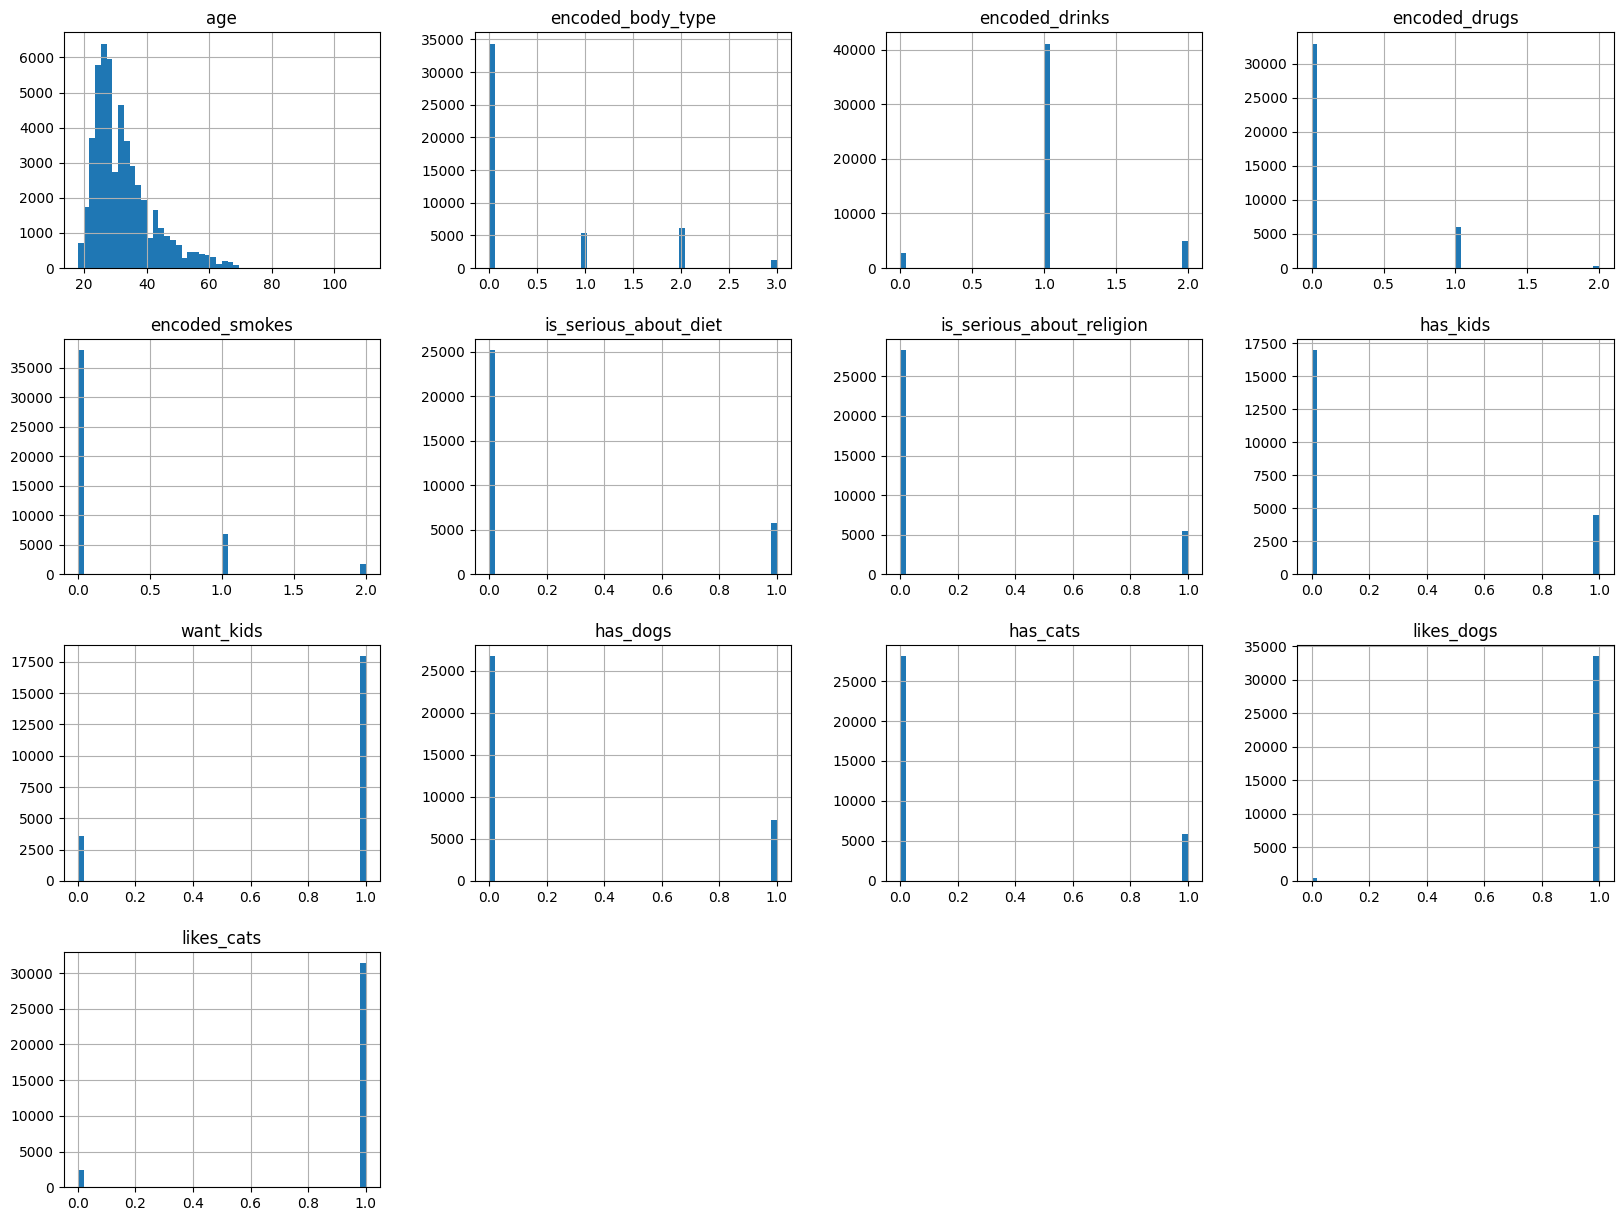

In [163]:
%matplotlib inline
import matplotlib.pyplot as plt
okcupid.hist(bins=50, figsize=(20,15))
plt.show()

In [164]:
okcupid=okcupid.copy()

In [165]:
#from sklearn.model_selection import train_test_split

#train_set, test_set = train_test_split(okcupid, test_size=0.2, random_state=42) 
#20% całego zbioru, 42 jako generator liczb pseudolosowych

In [166]:
#Ilość wartości Nan w kolumnie "encoded_body_type"
nan_count = okcupid["encoded_body_type"].isna().sum().sum()
print("Liczba wartości NaN w zbiorze danych w kolumnie:'encoded_body_type'", nan_count)
count_3 = (okcupid["encoded_body_type"] == 3.0).sum()
print("Liczba wartości 3.0 w zbiorze danych w kolumnie:'encoded_body_type'", count_3)
count_0 = (okcupid["encoded_body_type"] == 0.0).sum()
print("Liczba wartości 0.0 w zbiorze danych w kolumnie:'encoded_body_type'", count_0)

Liczba wartości NaN w zbiorze danych w kolumnie:'encoded_body_type' 4387
Liczba wartości 3.0 w zbiorze danych w kolumnie:'encoded_body_type' 1156
Liczba wartości 0.0 w zbiorze danych w kolumnie:'encoded_body_type' 34355


In [167]:
#Wypełnianie NaN medianą w "encoded_body_type"
median_enc_body_t = okcupid["encoded_body_type"].median()
okcupid = okcupid.reset_index(drop=True)
print(median_enc_body_t)
okcupid["encoded_body_type"].fillna(median_enc_body_t, inplace = True)

0.0


C:\Users\karma\AppData\Local\Temp\ipykernel_20920\3724104237.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  okcupid["encoded_body_type"].fillna(median_enc_body_t, inplace = True)


In [168]:
nan_count = okcupid.isna().sum().sum()
print("Liczba wartości NaN w zbiorze danych:", nan_count)

Liczba wartości NaN w zbiorze danych: 199528


In [169]:
okcupid["encoded_body_type"].value_counts() / len(okcupid)

encoded_body_type
0.0    0.754146
2.0    0.119053
1.0    0.104298
3.0    0.022503
Name: count, dtype: float64

In [170]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(okcupid, okcupid["encoded_body_type"]):
    strat_train_set = okcupid.loc[train_index]
    strat_test_set = okcupid.loc[test_index]

In [171]:
strat_test_set["encoded_body_type"].value_counts() / len(strat_test_set)

encoded_body_type
0.0    0.754161
2.0    0.119027
1.0    0.104331
3.0    0.022482
Name: count, dtype: float64

In [172]:
#Kopiowanie zbioru uczącego (treningowego)
okcupid = strat_train_set.copy()

In [173]:
nan_count = okcupid.isna().sum().sum()
print("Liczba wartości NaN w zbiorze danych:", nan_count)

Liczba wartości NaN w zbiorze danych: 159143


In [174]:
#Instalacja seaborn lokalnie ponieważ nie wykrywa pakietu mimo instalacji
#pip install seaborn
#Komórka prawdopodobnie do usunięcia - zadziałało po resecie

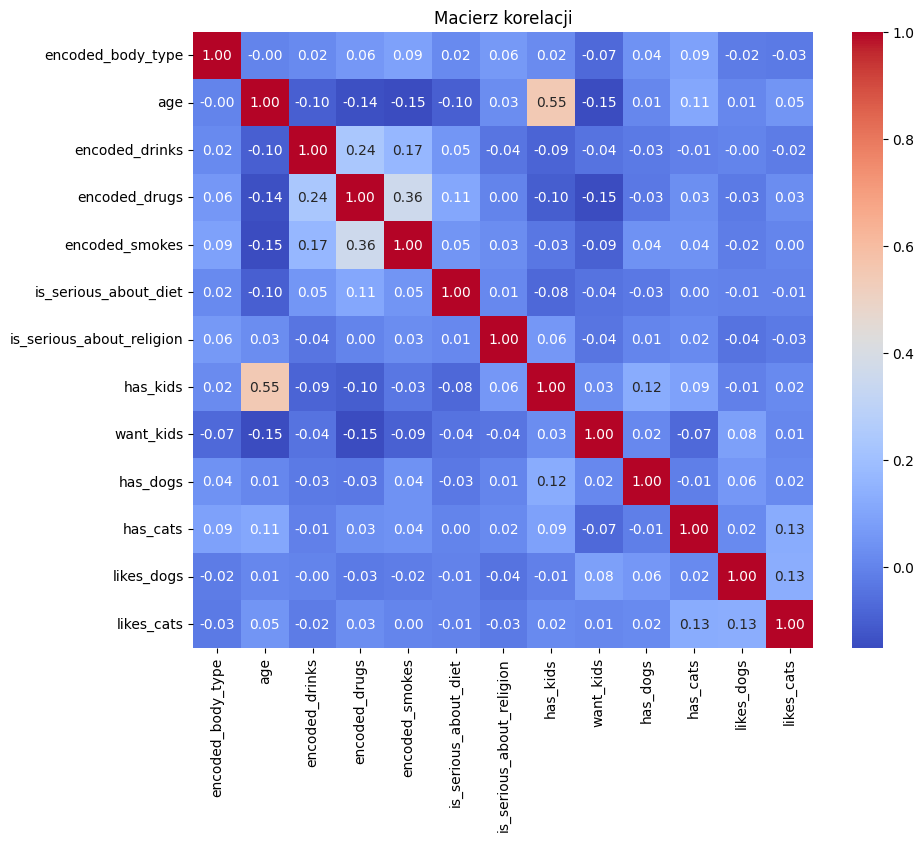

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt

# Wybrane kolumny
selected_columns = ["encoded_body_type", "age", "encoded_drinks", "encoded_drugs","encoded_smokes", "is_serious_about_diet", "is_serious_about_religion",
                    "has_kids", "want_kids", "has_dogs", "has_cats", "likes_dogs", "likes_cats"]

# Macierz korelacji dla kolumn numerycznych
correlation_matrix = okcupid[selected_columns].corr()

# Wyświetlenie macierzy korelacji jako wykres cieplny
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Macierz korelacji')
plt.show()

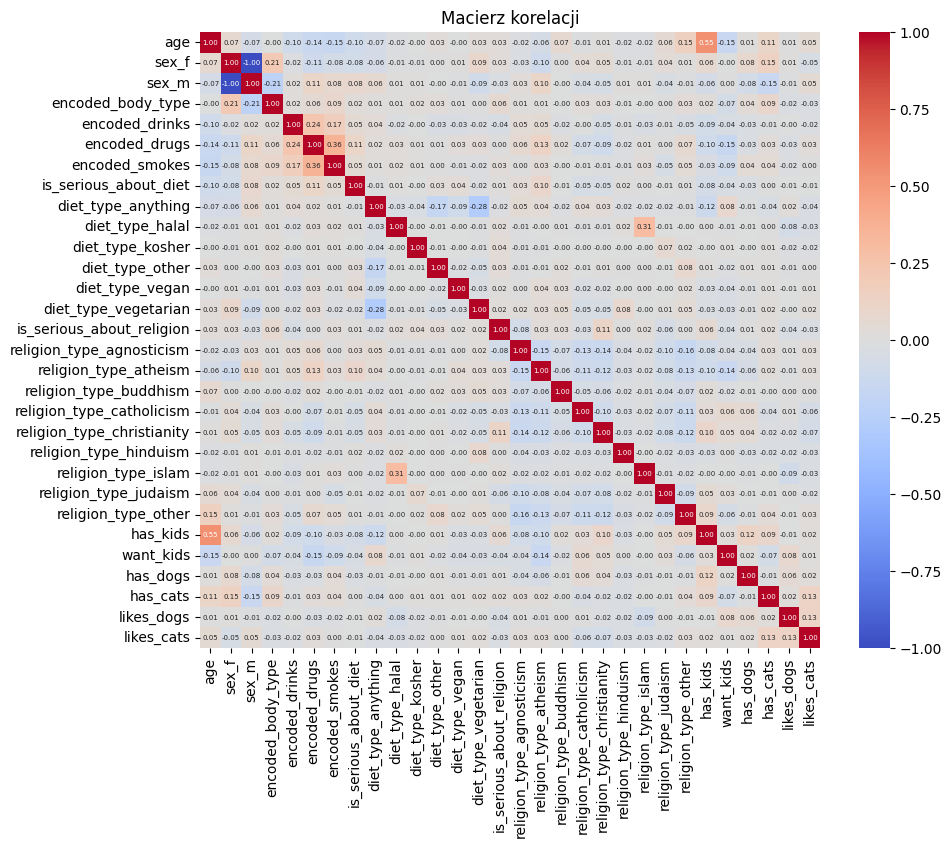

In [176]:
#Idzmy o krok dalej, sprawdźmy korelacje dla wszystkich kolumn, które nie są typu object

import seaborn as sns
import matplotlib.pyplot as plt

# Wybrane kolumny numeryczne
selected_columns_numeric = okcupid.select_dtypes(include=['int64', 'float64', 'bool']).columns

# Macierz korelacji dla kolumn numerycznych
correlation_matrix = okcupid[selected_columns_numeric].corr()

# Wyświetlenie macierzy korelacji jako wykres cieplny
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"fontsize":5})
plt.title('Macierz korelacji')
plt.show()

In [177]:
#Uzupełnienie wartości NaN

In [178]:
#Sprawdzenie, które kolumny zawierają NaN-y
nan_columns = okcupid.columns[okcupid.isnull().any()].tolist()
for column in nan_columns:
    print(f"\nKolumna '{column}':")
    print(okcupid[column].isnull().sum())


Kolumna 'education':
4463

Kolumna 'job':
5484

Kolumna 'encoded_drinks':
2063

Kolumna 'encoded_drugs':
9596

Kolumna 'encoded_smokes':
3860

Kolumna 'is_serious_about_diet':
16312

Kolumna 'is_serious_about_religion':
13965

Kolumna 'has_kids':
23828

Kolumna 'want_kids':
23828

Kolumna 'has_dogs':
13936

Kolumna 'has_cats':
13936

Kolumna 'likes_dogs':
13936

Kolumna 'likes_cats':
13936


In [179]:
#Sprawdzenie median, dla tych kolumn, które nie mają typu object

In [180]:
# Tworzenie słownika median dla poszczególnych kolumn
median_dict = {}

for column in okcupid.columns:
    if okcupid[column].dtype != 'object':
        median_value = okcupid[column].median()
        median_dict[column] = median_value

# Wyświetlanie słownika median
for column, median_value in median_dict.items():
    print(f"{column}: {median_value}")

for column, median_value in median_dict.items():
    filled_values = okcupid[column].fillna(median_value)
    if okcupid[column].isnull().any():
        print(f"Uzupełniono kolumnę {column}")
        okcupid[column] = filled_values

age: 30.0
sex_f: 0.0
sex_m: 1.0
encoded_body_type: 0.0
encoded_drinks: 1.0
encoded_drugs: 0.0
encoded_smokes: 0.0
is_serious_about_diet: 0.0
diet_type_anything: 0.0
diet_type_halal: 0.0
diet_type_kosher: 0.0
diet_type_other: 0.0
diet_type_vegan: 0.0
diet_type_vegetarian: 0.0
is_serious_about_religion: 0.0
religion_type_agnosticism: 0.0
religion_type_atheism: 0.0
religion_type_buddhism: 0.0
religion_type_catholicism: 0.0
religion_type_christianity: 0.0
religion_type_hinduism: 0.0
religion_type_islam: 0.0
religion_type_judaism: 0.0
religion_type_other: 0.0
has_kids: 0.0
want_kids: 1.0
has_dogs: 0.0
has_cats: 0.0
likes_dogs: 1.0
likes_cats: 1.0
Uzupełniono kolumnę encoded_drinks
Uzupełniono kolumnę encoded_drugs
Uzupełniono kolumnę encoded_smokes
Uzupełniono kolumnę is_serious_about_diet
Uzupełniono kolumnę is_serious_about_religion
Uzupełniono kolumnę has_kids
Uzupełniono kolumnę want_kids
Uzupełniono kolumnę has_dogs
Uzupełniono kolumnę has_cats
Uzupełniono kolumnę likes_dogs
Uzupełnion

In [181]:
#Ponowne sprawdzenie, które kolumny zawierają NaN-y
nan_columns = okcupid.columns[okcupid.isnull().any()].tolist()
for column in nan_columns:
    print(f"\nKolumna '{column}':")
    print(okcupid[column].isnull().sum())


Kolumna 'education':
4463

Kolumna 'job':
5484


In [182]:
#Uzupełnienie NaN-ów typu object za pomocą klasy SimpleImputer
#w strategii most_frequent
#Ze względu na możliwe późniejsze problemy ze stosowaniem algorytmów (?????)

In [185]:
from sklearn.impute import SimpleImputer

# Wybrane kolumny
selected_columns = ["education", "job"]

# Tworzenie instancji SimpleImputer z strategią 'most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

# Dopasowanie imputera do danych i transformacja danych
imputed_data = imputer.fit_transform(okcupid[selected_columns])

# Aktualizacja danych w DataFrame
okcupid[selected_columns] = imputed_data

# Wyświetlenie zaktualizowanego DataFrame
print(okcupid[selected_columns])

# Wyświetlenie wartości, które zostały użyte do uzupełnienia NaN-ów
for column in selected_columns:
    most_frequent_value = imputer.statistics_[selected_columns.index(column)]
    print(f"Wartość, która została użyta do uzupełnienia NaN-ów w kolumnie '{column}': {most_frequent_value}")


                               education                             job
42118  graduated from college/university                           other
6127   graduated from college/university  computer / hardware / software
8522         graduated from ph.d program    science / tech / engineering
16465  graduated from college/university    science / tech / engineering
13742      working on college/university                         student
...                                  ...                             ...
14887  dropped out of college/university    construction / craftsmanship
41283                 college/university                           other
35576          graduated from med school               medicine / health
34773            working on ph.d program                         student
2168   graduated from college/university                           other

[41097 rows x 2 columns]
Wartość, która została użyta do uzupełnienia NaN-ów w kolumnie 'education': graduated from college

In [186]:
#Sprawdzene NaN-ów
nan_count = okcupid.isna().sum().sum()
print("Liczba wartości NaN w zbiorze danych:", nan_count)

Liczba wartości NaN w zbiorze danych: 0


In [187]:
#Pominięcie kodowania one-hot dla kolumn [education] i [job]

In [188]:
#Skalowanie cech - [age]

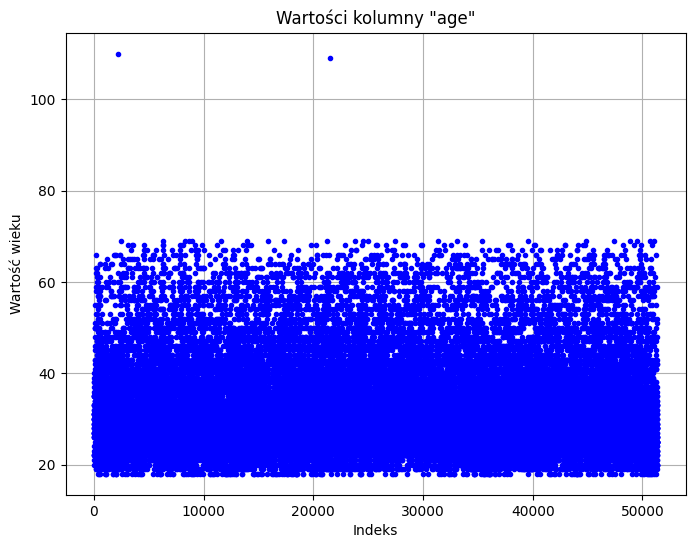

In [189]:
import matplotlib.pyplot as plt

# Wykres wartości dla kolumny "age"
plt.figure(figsize=(8, 6))
plt.plot(okcupid['age'], marker='o', linestyle='None', color='blue', markersize=3)
plt.title('Wartości kolumny "age"')
plt.xlabel('Indeks')
plt.ylabel('Wartość wieku')
plt.grid(True)
plt.show()

In [190]:
# Wyświetlenie wierszy, w których wartość kolumny "age" przekracza 100
print(okcupid[okcupid['age'] > 100])

# Usunięcie wierszy, w których wartość kolumny "age" przekracza 100
okcupid = okcupid[okcupid['age'] <= 100]

                                         id  age     status orientation  \
21527  31814d4d-bfcf-4b1f-a876-31a1df5a5eb5  109  available    straight   
2177   07d39024-e278-4939-af68-ad9b2cd1c53d  110     single    straight   

                               education      job  sex_f  sex_m  \
21527         working on masters program  student  False   True   
2177   graduated from college/university    other   True  False   

       encoded_body_type  encoded_drinks  ...  religion_type_hinduism  \
21527                0.0             1.0  ...                   False   
2177                 0.0             1.0  ...                   False   

       religion_type_islam  religion_type_judaism  religion_type_other  \
21527                False                  False                 True   
2177                 False                  False                False   

       has_kids  want_kids  has_dogs  has_cats  likes_dogs  likes_cats  
21527       0.0        1.0       0.0       0.0         1

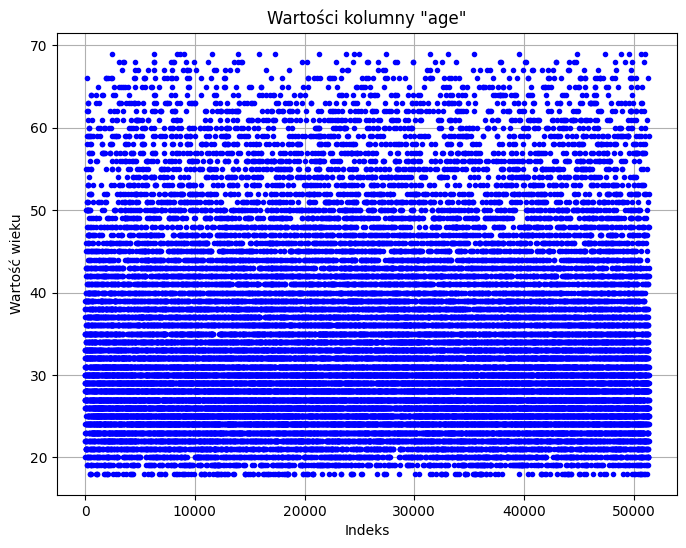

In [191]:
# Wykres wartości dla kolumny "age" po usunięciu
plt.figure(figsize=(8, 6))
plt.plot(okcupid['age'], marker='o', linestyle='None', color='blue', markersize=3)
plt.title('Wartości kolumny "age"')
plt.xlabel('Indeks')
plt.ylabel('Wartość wieku')
plt.grid(True)
plt.show()

In [ ]:
#Skalowanie kolumny [age] poprzez standaryzację
